# Exploratory Data Analysis

### Notebook Outline

This notebook we will explore the dataset to understand the distribution and relationships between different features, to help us build and evaluate a model which can accurately classify patients based on these features, contributing to the early detection and management of heart disease. 

##### Dataset Description

The dataset includes the following attributes:

- **Age**: Age of the patient in years.
- **Sex**: Gender of the patient (Male or Female).
- **ChestPainType**: Type of chest pain experienced (Typical Angina, Atypical Angina, Non-Anginal Pain, Asymptomatic).
- **RestingBP**: Resting blood pressure in mm Hg.
- **Cholesterol**: Serum cholesterol level in mg/dl.
- **FastingBS**: Fasting blood sugar level (1 if > 120 mg/dl, 0 otherwise).
- **RestingECG**: Results of the resting electrocardiogram (Normal, ST-T wave abnormality, Left ventricular hypertrophy).
- **MaxHR**: Maximum heart rate achieved.
- **ExerciseAngina**: Presence of exercise-induced angina (Yes or No).
- **Oldpeak**: Depression induced by exercise relative to rest.
- **ST_Slope**: Slope of the peak exercise ST segment (Upsloping, Flat, Downsloping).
- **HeartDisease**: Target variable indicating the presence (1) or absence (0) of heart disease.



In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('/src/heart.csv')

To start our analysis, we will conduct basic exploratory data analysis (EDA) to understand the structure and properties of our dataset. This includes checking the dimensions of the dataset, summarizing its statistical properties, examining data types, and previewing the first few rows.

In [25]:
df.shape

(918, 12)

In [26]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [28]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Now let us check for missing values and the number of unique values in each column. This will help us identify any potential data quality issues and understand the values each variable holds.

In [29]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [30]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [31]:
df.duplicated().sum()

0

## Data Visualization

1. **Unique Values per Column**

2. **Univariate Analysis for Categorical and Numerical Columns:**
   - Univariate analysis will be conducted separately for categorical and numerical columns.
   - For categorical columns, bar plots will be utilized to visualize the distribution of each category.
   - For numerical columns, histograms will be used to observe the frequency distribution of values.

3. **Outlier Detection & Data Skew:**
   - Outliers, which are observations significantly different from other data points, will be identified.
   - Box & scatter plots will be employed to visualize the presence of outliers in numerical variables.
   - Skewness, a measure of asymmetry in the distribution of numerical data, will be examined.

4. **Bivariate Analysis with Target Variable:**
   - Bivariate analysis will involve exploring the relationship between predictor variables and the target variable (HeartDisease).

5. **Correlation**
   - Plot heatmap of numerical columns
     
By following this structured approach to data visualization, we aim to gain a comprehensive understanding of the dataset, identify any anomalies or patterns, and prepare the data for further analysis and modeling.

#### Unique Values per Column

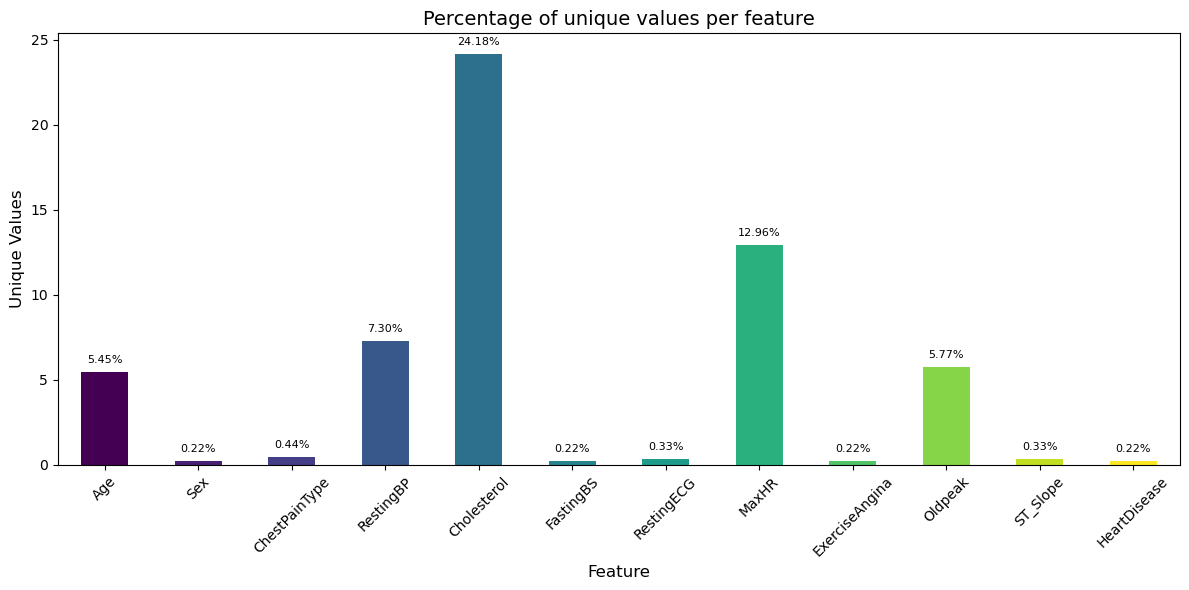

In [32]:
plt.figure(figsize=(12, 6))
unique_values = (df.nunique() / len(df)) * 100
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))
bars = unique_values.plot(kind='bar', color=colors)

for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:.2f}%', 
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 5), 
                  textcoords='offset points',
                  ha='center', va='bottom', fontsize=8)

plt.title('Percentage of unique values per feature', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Unique Values', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

#### Univariate Analysis for Categorical Columns

In [33]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

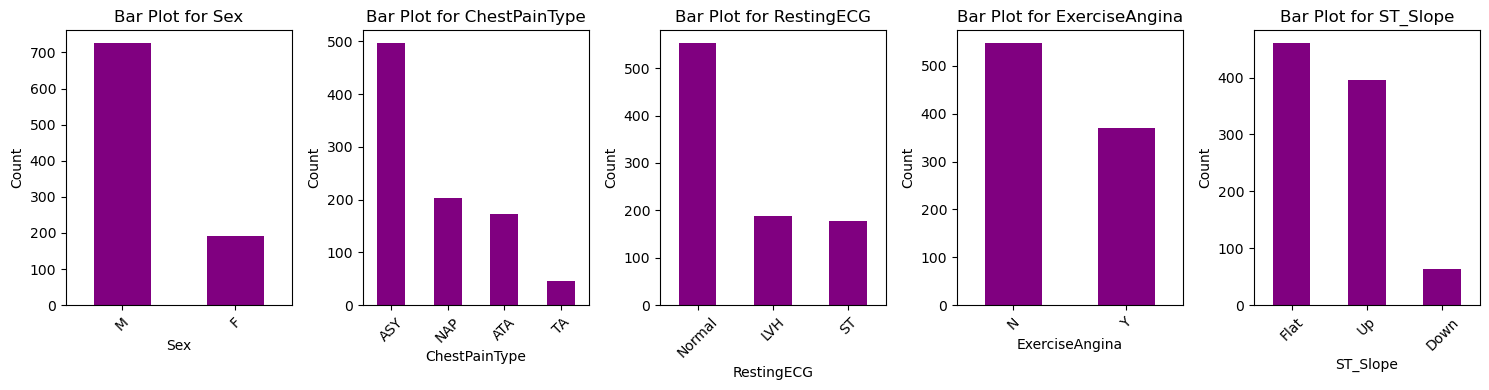

In [34]:
fig, axs = plt.subplots(1, len(categorical_columns), figsize=(15, 4)) 

for i, cat_col in enumerate(categorical_columns):
    ax = axs[i]  
    df[cat_col].value_counts().plot(kind='bar', color='purple', ax=ax)
    ax.set_title(f'Bar Plot for {cat_col}')
    ax.set_xlabel(cat_col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout() 
plt.show()

#### Univariate Analysis for Numerical Columns

In [35]:
numerical_columns = list(df.select_dtypes(include=['number']).columns)
numerical_columns.remove('HeartDisease')

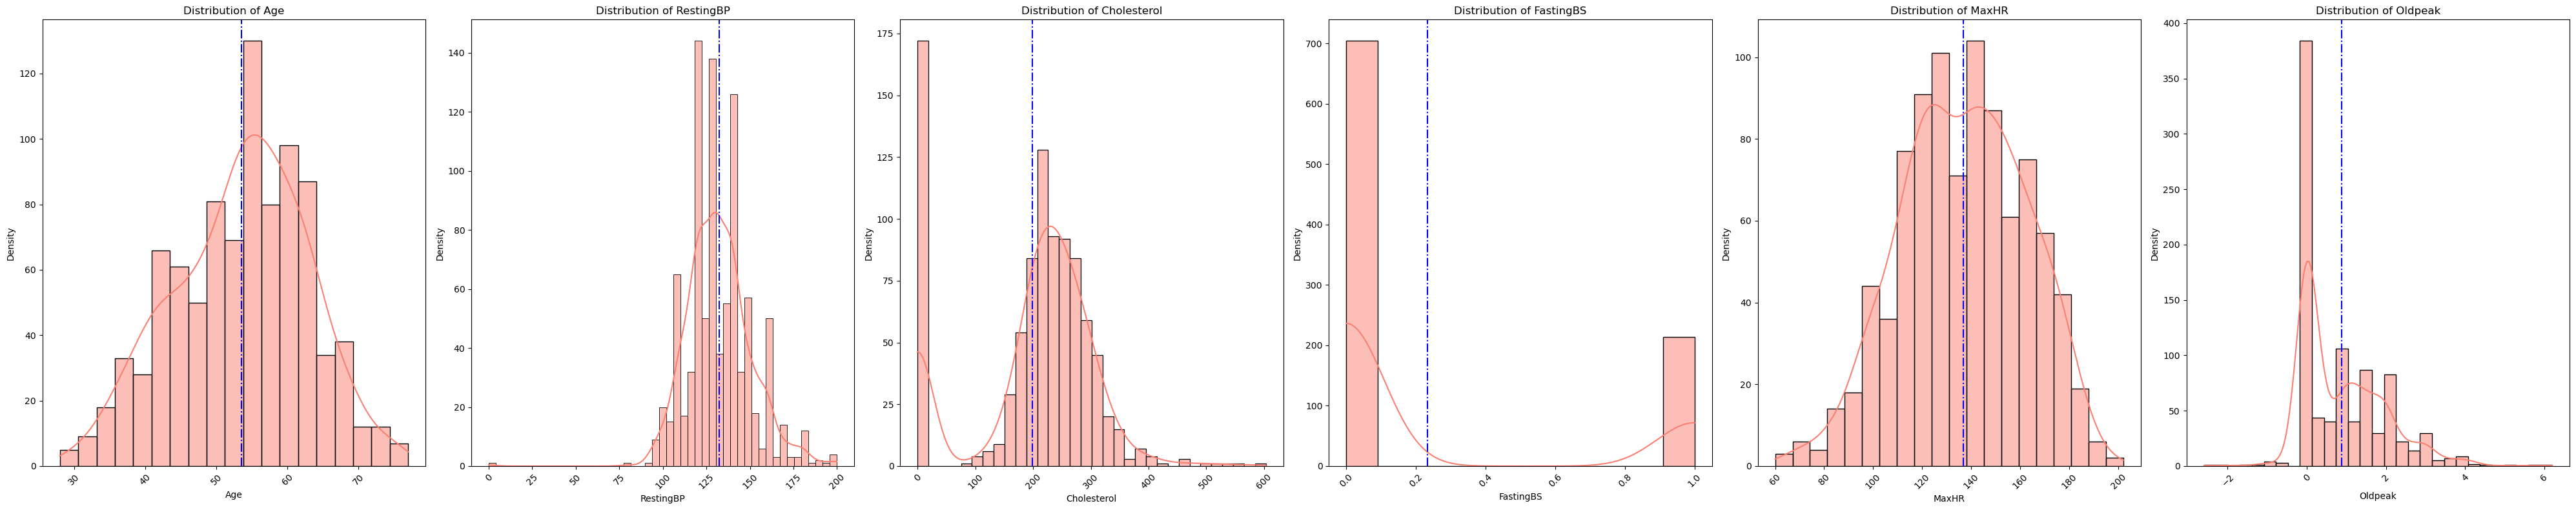

In [36]:
fig, axs = plt.subplots(1, len(numerical_columns), figsize=(40, 8)) 

for i, num_col in enumerate(numerical_columns):
    ax = axs[i]
    sns.histplot(df[num_col], kde=True, color='salmon', ax=ax)
    ax.set_title(f'Distribution of {num_col}')
    ax.set_xlabel(num_col)
    ax.set_ylabel('Density')
    ax.axvline(x=np.mean(df[num_col]), color='blue', linestyle='-.')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Outliers & Skewness

- **Outliers:** Individual points that are significantly distant from the rest of the data points. These points indicate unusual or extreme values in the dataset.
  
- **Skewness:** Direction of skewness in the data is important as well. If the median line inside the box is not centered, it suggests skewness in the distribution. Skewed distributions have a higher concentration of values on one side of the median, indicating potential data asymmetry.


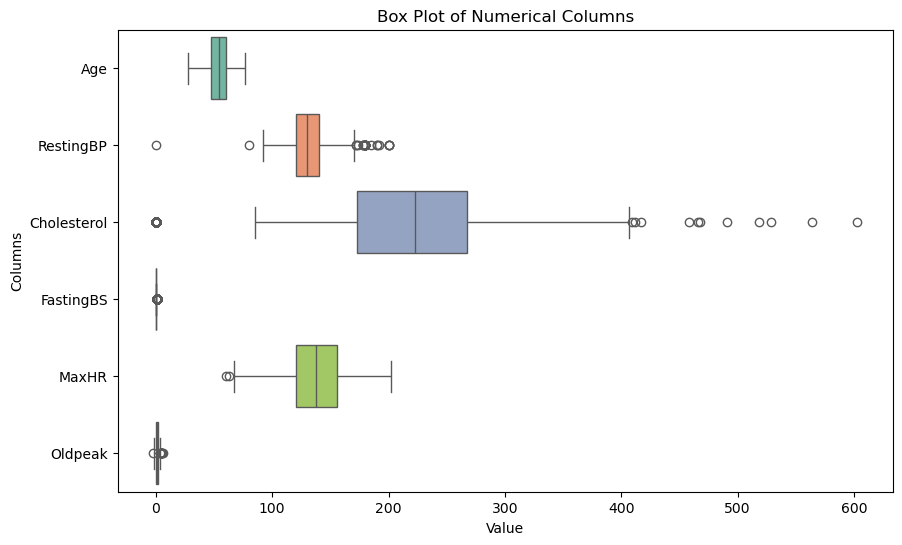

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns], orient='h', palette='Set2')
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Value')
plt.ylabel('Columns')
plt.show()

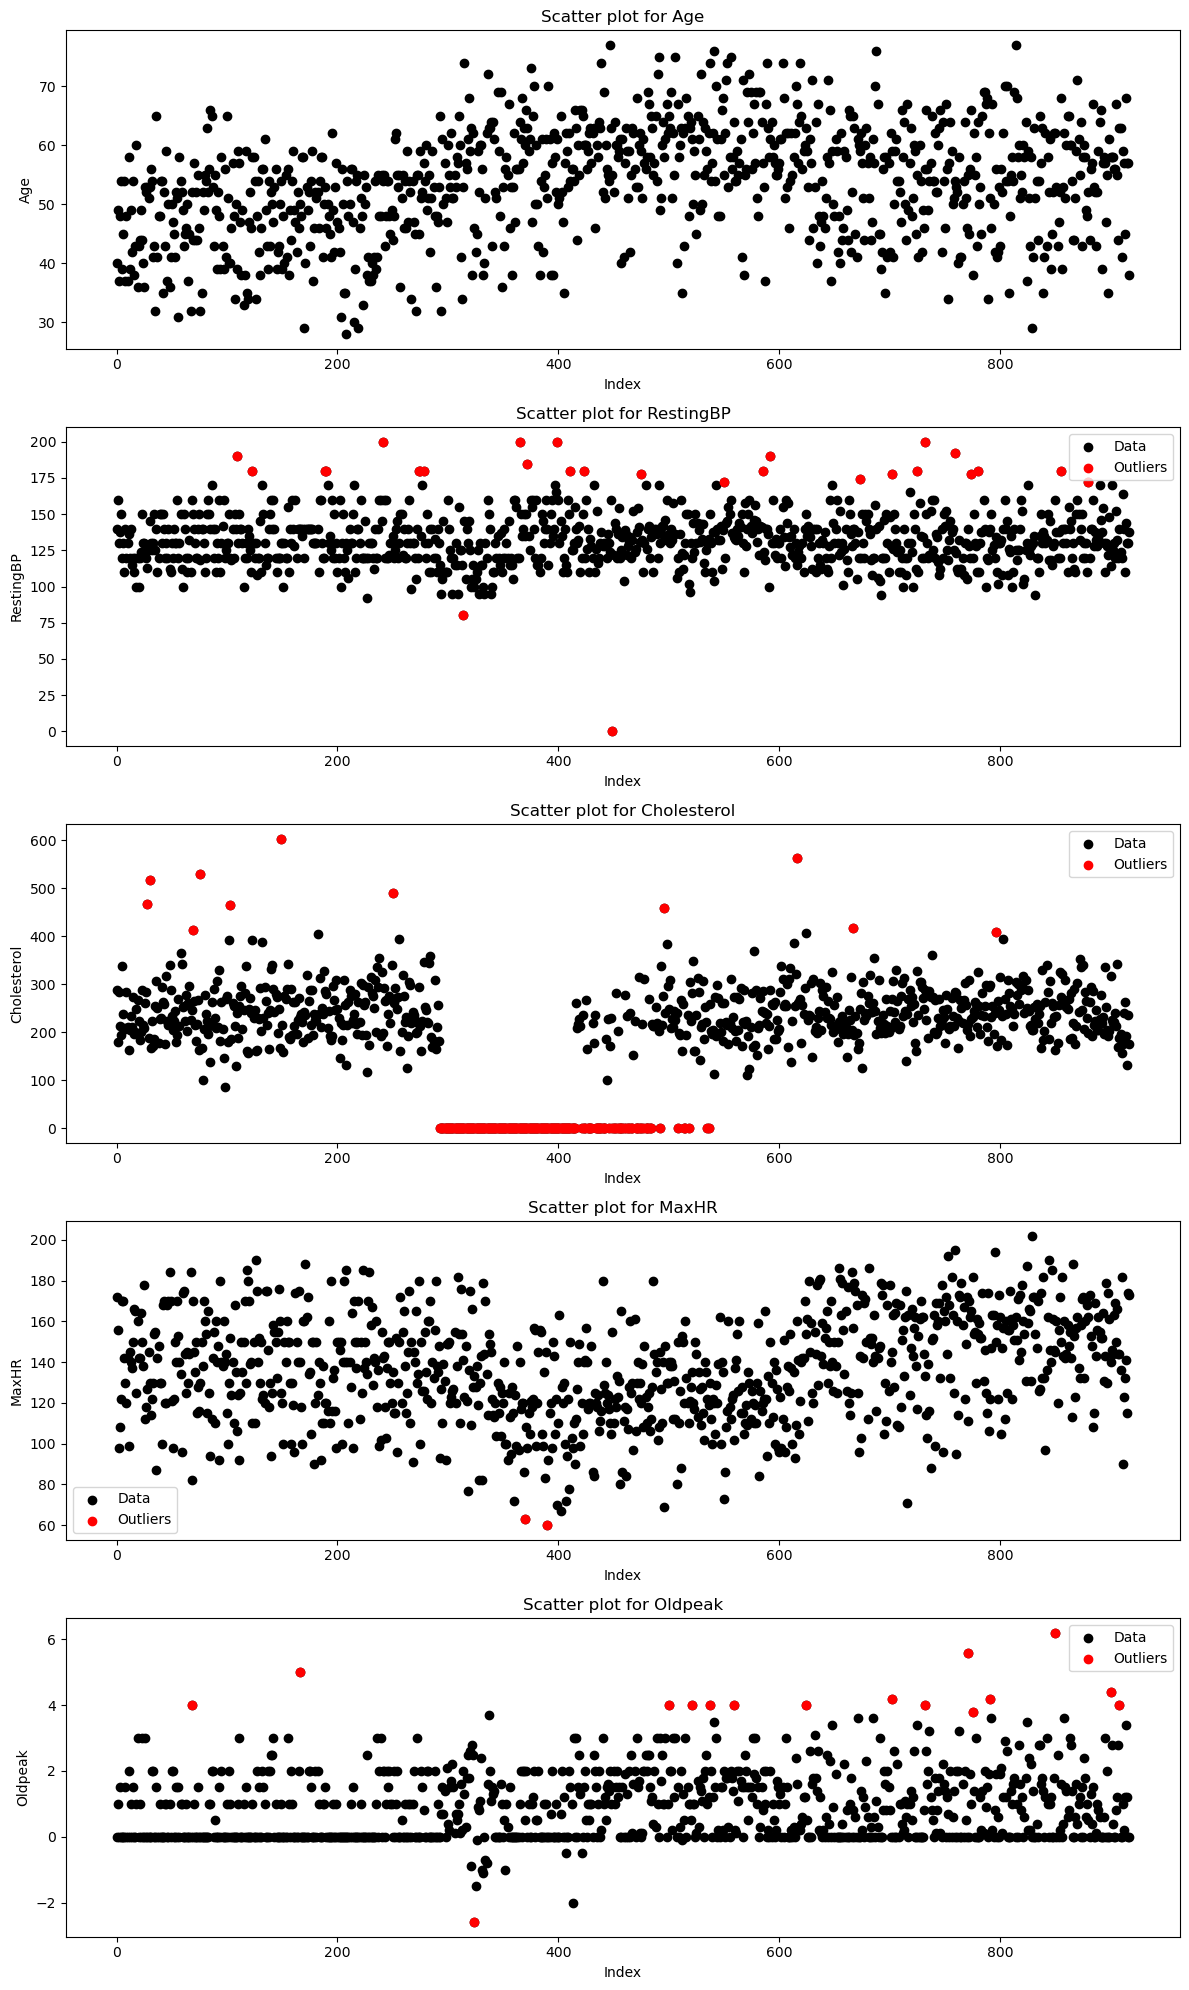

In [38]:
def plot_outliers(df):
    col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    fig, axs = plt.subplots(len(col), 1, figsize=(12, 20))

    for i, column in enumerate(col):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)        
        IQR = Q3 - Q1
        outlier_threshold = 1.5 * IQR
        outliers = df[(df[column] < (Q1 - outlier_threshold)) | (df[column] > (Q3 + outlier_threshold))][column]
        
        axs[i].scatter(df.index, df[column], label='Data', color='black')
        axs[i].set_title(f'Scatter plot for {column}')
        axs[i].set_xlabel('Index')
        axs[i].set_ylabel(column)
        
        if not outliers.empty:
            axs[i].scatter(outliers.index, outliers, color='red', label='Outliers')
            axs[i].legend()

    plt.tight_layout()
    plt.show()

plot_outliers(df)


### Bivariate Analysis with Target Variable

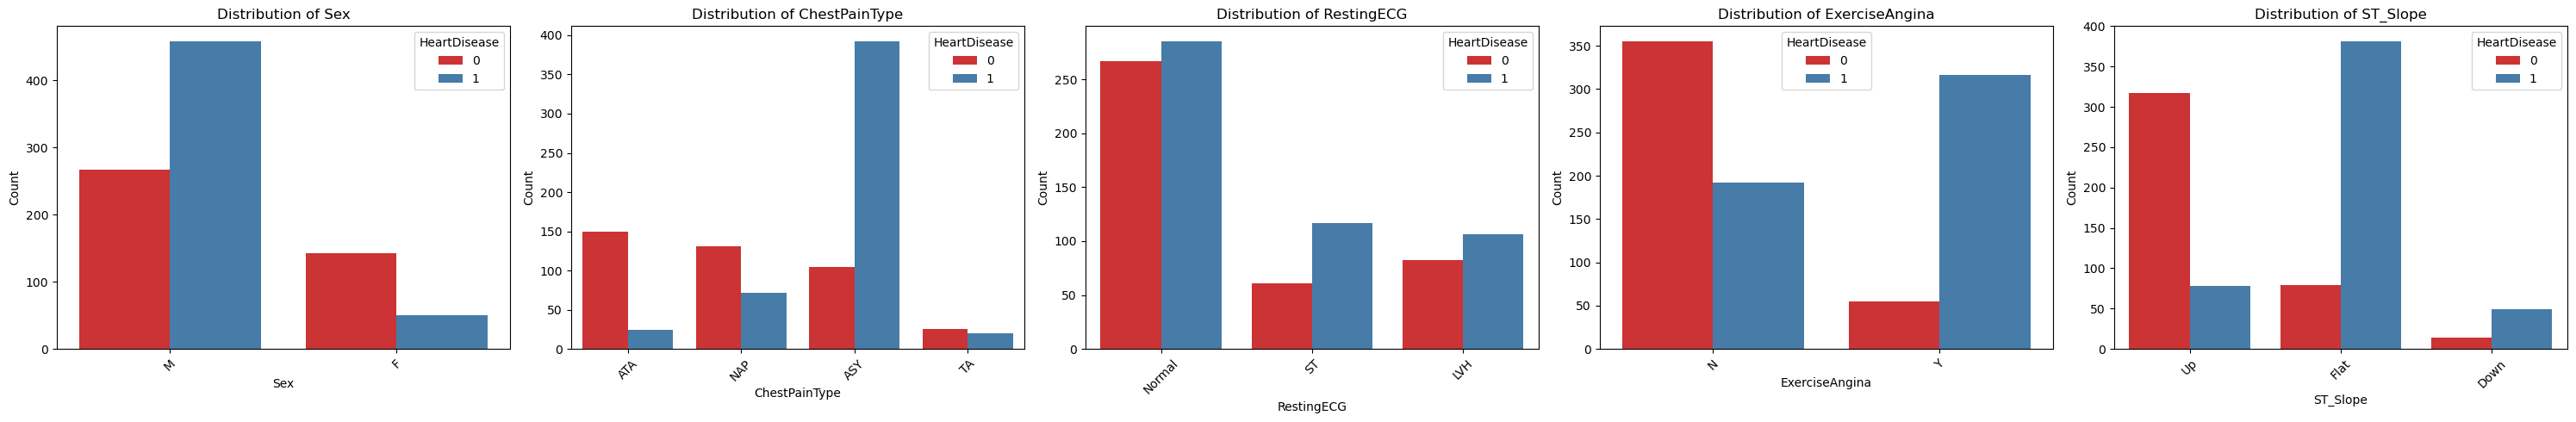

In [39]:
# Categorical columns
fig, axs = plt.subplots(1, len(categorical_columns), figsize=(30, 5)) 

for i, cat_col in enumerate(categorical_columns):
    ax = axs[i]
    sns.countplot(data=df, x=cat_col, hue='HeartDisease', ax=ax, palette='Set1')
    ax.set_title(f'Distribution of {cat_col}')
    ax.set_xlabel(cat_col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

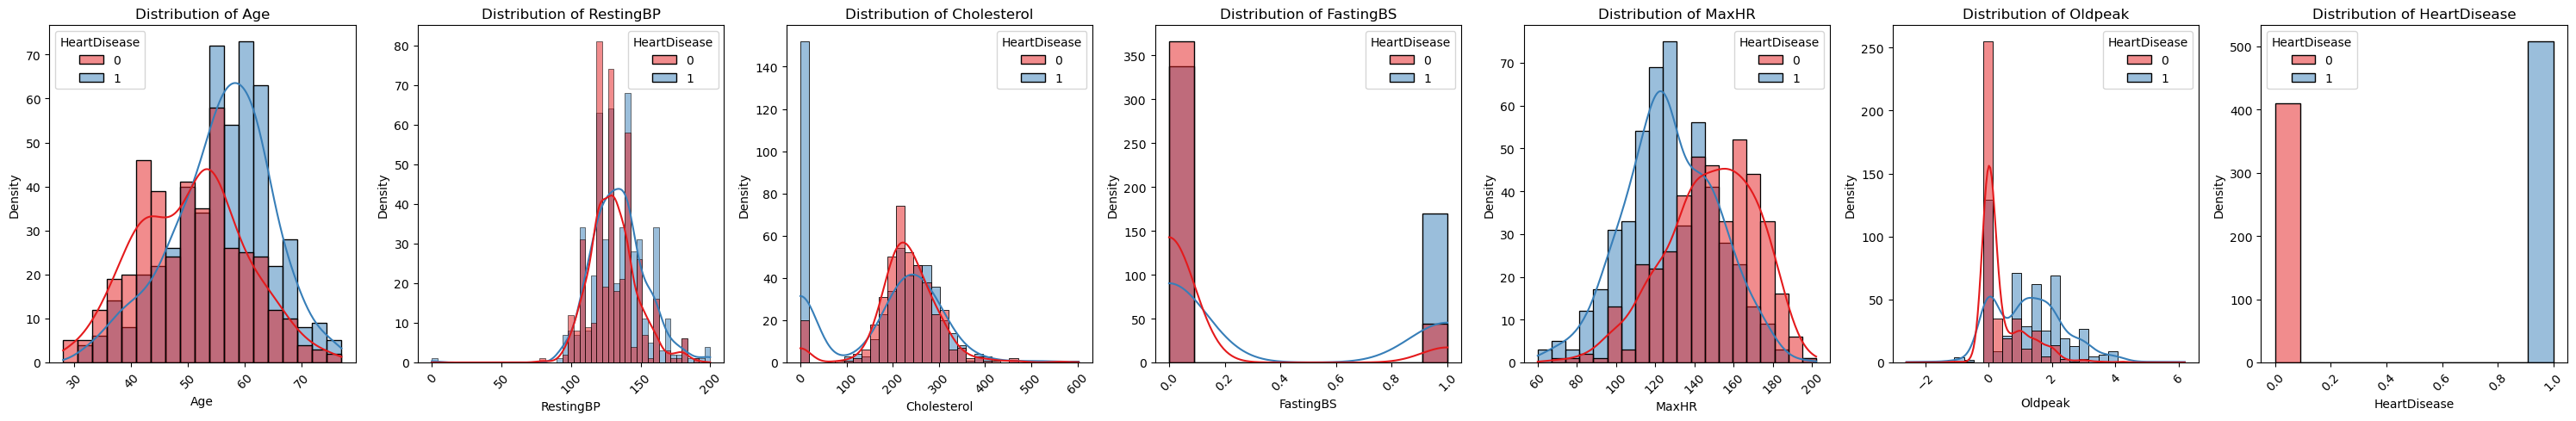

In [40]:
# Numerical columns
numerical_columns = list(df.select_dtypes(include=['number']).columns)
fig, axs = plt.subplots(1, len(numerical_columns), figsize=(30, 5)) 

for i, num_col in enumerate(numerical_columns):
    ax = axs[i]
    sns.histplot(data=df, x=num_col, kde=True, hue='HeartDisease', ax=ax, palette='Set1')
    ax.set_title(f'Distribution of {num_col}')
    ax.set_xlabel(num_col)
    ax.set_ylabel('Density')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

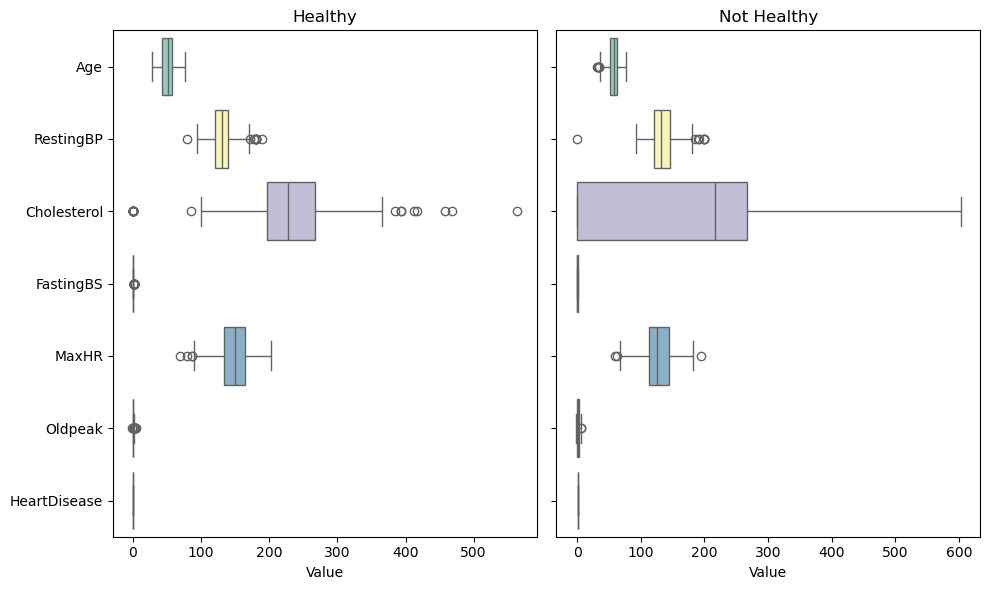

In [41]:
heart_disease_1 = df[df['HeartDisease'] == 1][numerical_columns]
heart_disease_0 = df[df['HeartDisease'] == 0][numerical_columns]

fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

sns.boxplot(data=heart_disease_0, orient='h', palette='Set3', ax=axs[0])
axs[0].set_title('Healthy')
axs[0].set_xlabel('Value')
sns.boxplot(data=heart_disease_1, orient='h', palette='Set3', ax=axs[1])
axs[1].set_title('Not Healthy')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Columns')

plt.tight_layout()
plt.show()


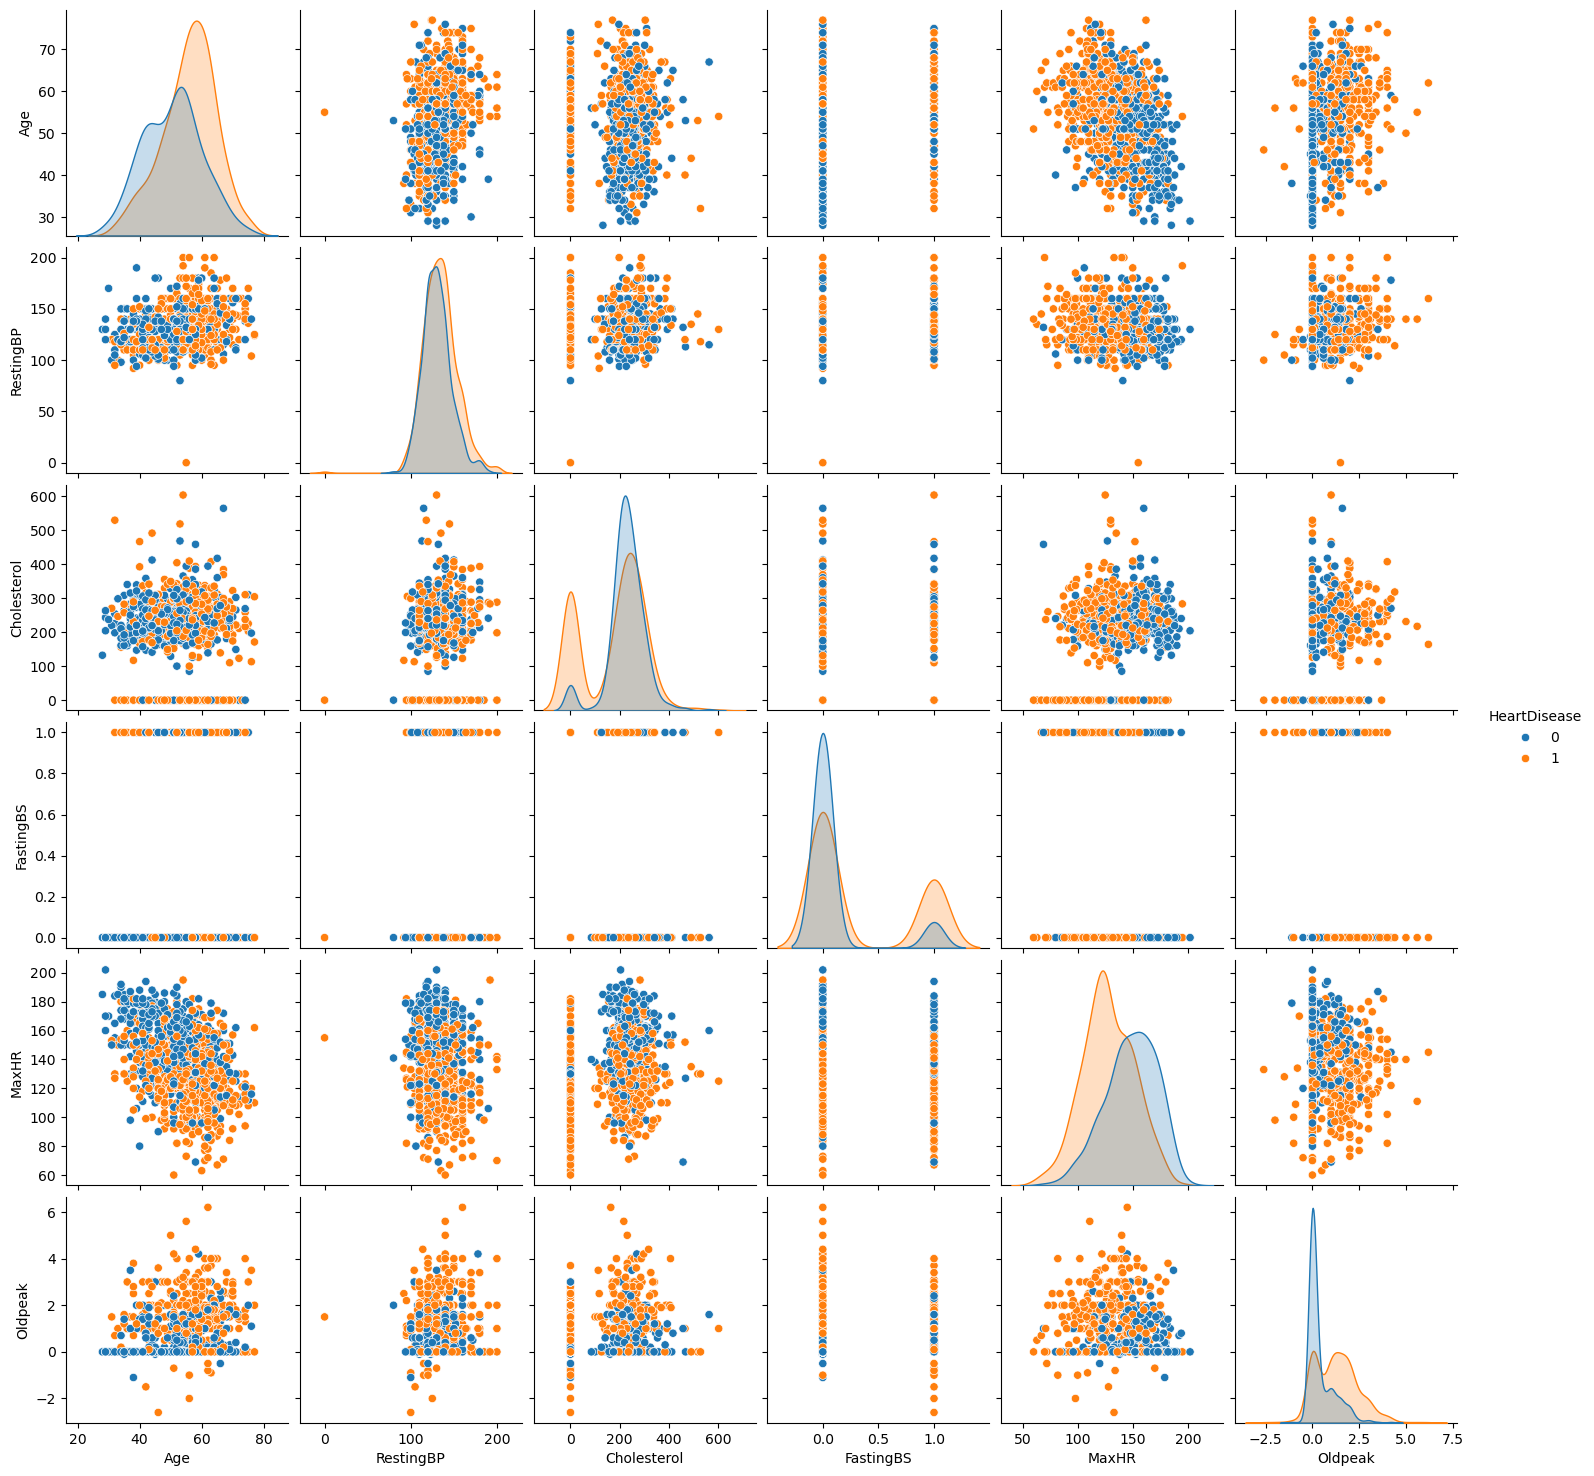

In [42]:
sns.pairplot(df, hue='HeartDisease')

### Correlation

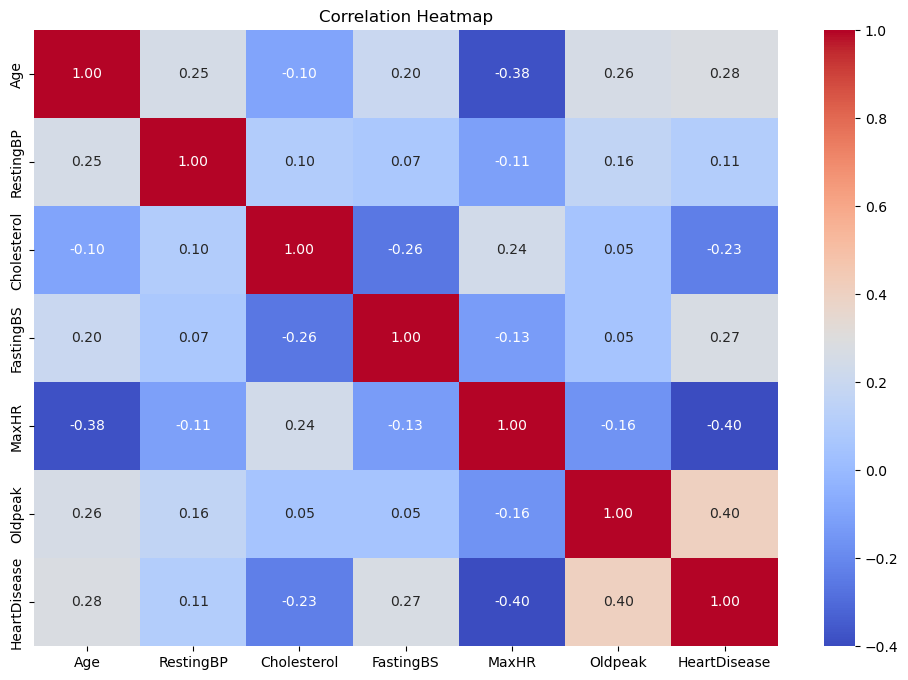

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()